<a href="https://colab.research.google.com/github/abdulkadirdemirci/CRM-anaysis/blob/main/CRM_kural_tabanli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İŞ PROBLEMİ : 
Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak
seviye tabanlı (level based) yeni müşteri tanımları (persona)
oluşturmak ve bu yeni müşteri tanımlarına göre segmentler
oluşturup bu segmentlere göre yeni gelebilecek müşterilerin
şirkete ortalama ne kadar kazandırabileceğini tahmin etmek
istemektedir.


Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu
ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır.


ÖNEMLİ KISIMLAR:

* Veri seti her satış işleminde oluşan kayıtlardan meydana gelmektedir.
* Bunun anlamı tablo tekilleştirilmemiştir. 
* Diğer bir ifade ile belirli demografik özelliklere sahip bir
kullanıcı birden fazla alışveriş yapmış olabilir. 


* PRICE   – Müşterinin harcama tutarı
* SOURCE  – Müşterinin bağlandığı cihaz türü
* SEX     – Müşterinin cinsiyeti
* COUNTRY – Müşterinin ülkesi
* AGE     – Müşterinin yaşı

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

soru : persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

todos:
1. veri seti okutulacak +
2. describe() +
3. info() +
4. object type dgişkenlerin sınıf sayısını gösteren bir fonk yaz

faced problems:
1. veri seti okuturken path deki "/" leri "\" ile manuel olarak değiştirmek
2. veri setinde değişkenlerin adı BÜYÜK bunlar kod yazarken akıcılığı sağlamak için küçültülmeli

In [2]:
persona = pd.read_csv("/content/drive/MyDrive/veriler/persona.csv")
df = persona.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [5]:
df.nunique()

PRICE       6
SOURCE      2
SEX         2
COUNTRY     6
AGE        46
dtype: int64

 column isimlerini küçültmek

In [6]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['price', 'source', 'sex', 'country', 'age'], dtype='object')

# ///  GÖREV 1 - SORU 2  ///////////////////////////////////////////
soru : Kaç unique SOURCE vardır? Frekansları nedir?

* todos: ayrı ayrı bastırılan çıktıları tek bir print içinde göster
* faced problems: -
* link : https://seaborn.pydata.org/tutorial/color_palettes.html


In [7]:
print(f"""source değişkeninin eşsiz değer ve miktarları:{df["source"].value_counts()}
      source değişkeninin unique degerleri: {df["source"].unique()}
      source degişkeninin unique deger sayısı: {df["source"].nunique()}""")

source değişkeninin eşsiz değer ve miktarları:android    2974
ios        2026
Name: source, dtype: int64
      source değişkeninin unique degerleri: ['android' 'ios']
      source degişkeninin unique deger sayısı: 2


In [8]:
df["source"].value_counts()

android    2974
ios        2026
Name: source, dtype: int64

In [9]:
df["source"].unique()

array(['android', 'ios'], dtype=object)

In [10]:
df["source"].nunique()

2

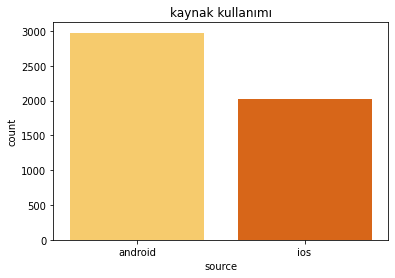

In [11]:
sns.countplot(x=df["source"],data=df,saturation=0.9,palette="YlOrBr")
plt.title("kaynak kullanımı")
plt.show()

# ///  GÖREV 1 - SORU 3  /////////////////////////////////////////////
"""
soru : Kaç unique PRICE vardır?

* todos: -
* faced problems: -
"""

In [12]:
df["price"].nunique()

6

In [13]:
df["price"].unique()

array([39, 49, 29, 19, 59,  9])

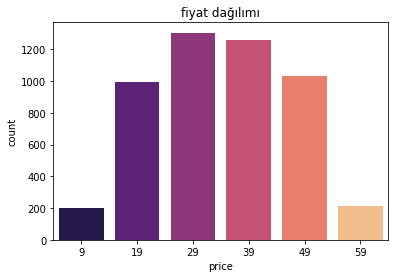

In [14]:
sns.countplot(x=df["price"],data=df,saturation=0.8,palette="magma")
plt.title("fiyat dağılımı")
plt.show()

# ///  GÖREV 1 - SORU 4  ///////////////////////////////////////////
"""
soru : Hangi PRICE'dan kaçar tane satış gerçekleşmiş? yani unique degerlerin frekansı

* todos: -
* faced problems: -
"""

In [15]:
df["price"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: price, dtype: int64

# ///  GÖREV 1 - SORU 5  /////////////////////////////////////////////
"""
soru : Hangi ülkeden kaçar tane satış olmuş? yani unique degerlerin frekansı

* todos: -
* faced problems: -
"""

In [16]:
df["country"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: country, dtype: int64

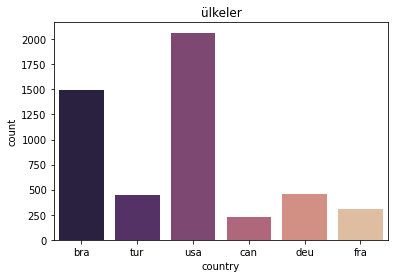

In [17]:
sns.countplot(x=df["country"],saturation=0.5,palette="magma")
plt.title("ülkeler")
plt.show()

# ///  GÖREV 1 - SORU 6  ///////////////////////////////////////////
"""
soru : Ülkelere göre satışlardan toplam ne kadar kazanılmış?

* todos: groupby("country), aggregate according to "price"
* faced problems: "sum" ile ["sum"] arasındaki fark önemli, 
hangi toplulaştırma fonk.uyguladıgımızı görmeliyiz
"""

In [18]:
df.groupby("country").agg({"price": ["sum"]})

,price
,sum
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [19]:
df.groupby("country").agg({"price": "sum"})

,price
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [23]:
df.groupby("country")["price"].aggregate(["sum"])

,sum
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [21]:
df.pivot_table("price", "country", aggfunc=["sum"])

,sum
,price
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [24]:
df.groupby("country")[["price"]].aggregate(["sum"])

,price
,sum
country,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


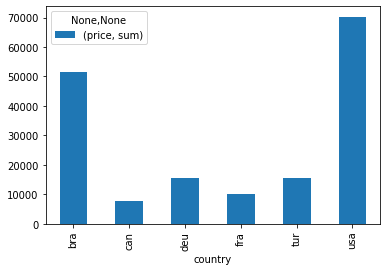

In [25]:
df.groupby("country")[["price"]].aggregate(["sum"]).plot(kind="bar")
plt.show()

# ///  GÖREV 1 - SORU 7  ////////////////////////////////////////////
soru : SOURCE türlerine göre satış sayıları nedir?

* todos: groupby("source), aggregate using "count"
* faced problems: 
1. "count" ile ["count"] arasındaki fark önemli, 
hangi toplulaştırma fonk.uyguladıgımızı görmeliyiz
2. pivot_table da df.pivot_table("source","source",aggfunc=["count"]) yazınca 
value error verdi. 

In [26]:
df.groupby("source").agg({"source": ["count"]})

,source
,count
source,
android,2974
ios,2026


In [27]:
df.groupby("source")[["source"]].aggregate(["count"])

,source
,count
source,
android,2974
ios,2026


In [28]:
df.pivot_table("age", "source", aggfunc=["count"])

,count
,age
source,
android,2974
ios,2026


# ///  GÖREV 1 - SORU 8  /////////////////////////////////////////////
"""
soru : Ülkelere göre PRICE ortalamaları nedir?

* todos: groupby("country), aggregate using "mean" over "price"
* faced problems: elde edilen sonuçta noktdan sonra sadece 3 basamak görmek istiyorum +
* link: https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python/8885688#8885688
"""

In [29]:
pd.options.display.float_format = '{:.3f}'.format

In [30]:
df.groupby("country").agg({"price":["mean"]})

,price
,mean
country,
bra,34.328
can,33.609
deu,34.033
fra,33.587
tur,34.787
usa,34.007


In [31]:
df.groupby("country")[["price"]].aggregate(["mean"])

,price
,mean
country,
bra,34.328
can,33.609
deu,34.033
fra,33.587
tur,34.787
usa,34.007


In [32]:
df.pivot_table("price", "country", aggfunc=["mean"])

,mean
,price
country,
bra,34.328
can,33.609
deu,34.033
fra,33.587
tur,34.787
usa,34.007


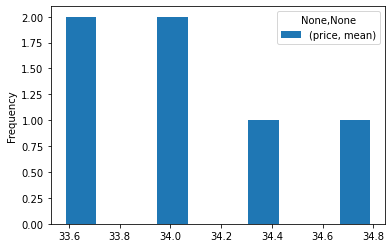

In [33]:
df.groupby("country")[["price"]].aggregate(["mean"]).plot(kind="hist")
plt.show()

# ///  GÖREV 1 - SORU 9  ////////////////////////////////////////////
"""
soru : SOURCE'lara göre PRICE ortalamaları nedir?

* todos: groupby("source), aggregate using "mean" over "price"
* faced problems: elde edilen sonuçta noktdan sonra sadece 3 basamak görmek istiyorum
"""

In [34]:
df.groupby("source").agg({"price": ["mean"]})

,price
,mean
source,
android,34.175
ios,34.069


In [35]:
df.groupby("source")[["price"]].aggregate(["mean"])

,price
,mean
source,
android,34.175
ios,34.069


In [36]:
df.pivot_table("price", "source", aggfunc=["mean"])

,mean
,price
source,
android,34.175
ios,34.069


# ///  GÖREV 1 - SORU 10 ////////////////////////////////////////////
"""
soru : COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

* todos: groupby(["country","source]), aggregate using "mean" over "price"
* faced problems: 
1. elde edilen sonuçta noktdan sonra sadece 3 basamak görmek istiyorum +
2. grafik sadece android olanları çizdiriyor
"""

In [37]:
df.groupby(["country", "source"]).agg({"price": ["mean","median"]})

price       
                  mean median
country source               
bra     android 34.387 39.000
        ios     34.222 39.000
can     android 33.331 29.000
        ios     33.951 29.000
deu     android 33.870 29.000
        ios     34.269 39.000
fra     android 34.312 29.000
        ios     32.776 29.000
tur     android 36.229 39.000
        ios     33.273 29.000
usa     android 33.760 29.000
        ios     34.372 39.000

In [38]:
df.groupby(["country", "source"]).price.aggregate(["mean"])

mean
country source        
bra     android 34.387
        ios     34.222
can     android 33.331
        ios     33.951
deu     android 33.870
        ios     34.269
fra     android 34.312
        ios     32.776
tur     android 36.229
        ios     33.273
usa     android 33.760
        ios     34.372

In [39]:
df.pivot_table("price", ["country", "source"], aggfunc=["mean"])

mean
                 price
country source        
bra     android 34.387
        ios     34.222
can     android 33.331
        ios     33.951
deu     android 33.870
        ios     34.269
fra     android 34.312
        ios     32.776
tur     android 36.229
        ios     33.273
usa     android 33.760
        ios     34.372

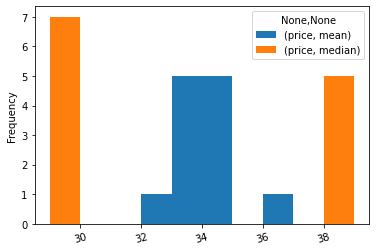

In [40]:
df.groupby(["country", "source"]).agg({"price": ["mean","median"]}).plot(kind="hist")
plt.xticks(rotation=15)
plt.show()

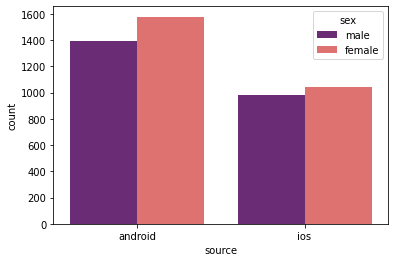

In [41]:
sns.countplot(x="source",data=df,hue="sex",palette="magma")
plt.show()

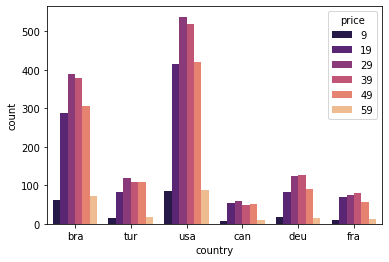

In [42]:
sns.countplot(x="country",data=df,hue="price",palette="magma")
plt.show()

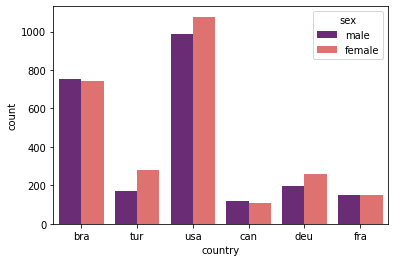

In [43]:
sns.countplot(x="country",data=df,hue="sex",palette="magma")
plt.show()

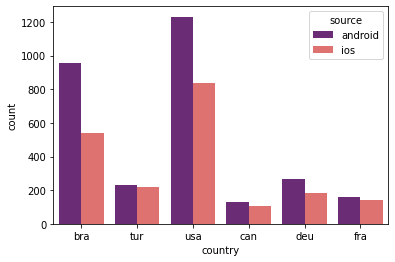

In [46]:
sns.countplot(x="country",data=df,hue="source",palette="magma")
plt.show()

In [49]:
df["source"].value_counts().values.tolist()


[2974, 2026]

In [50]:
df["source"].value_counts().keys().tolist()

['android', 'ios']

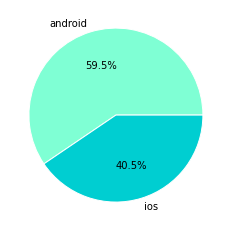

In [51]:
plt.pie(df["source"].value_counts().values.tolist(),
        labels=df["source"].value_counts().keys().tolist(),
        labeldistance=1.1,
        wedgeprops={"linewidth":1,"edgecolor":"white"},
        colors=["#7FFFD4","#00CED1"],
        autopct="%1.1f%%"
)
plt.show()

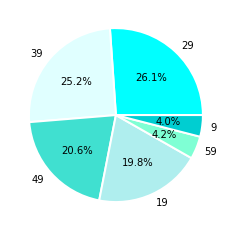

In [52]:
plt.pie(df["price"].value_counts().values.tolist(),
        labels=df["price"].value_counts().keys().tolist(),
        labeldistance=1.1,
        wedgeprops={"linewidth":2,"edgecolor":"white"},
        colors=["#00FFFF","#E0FFFF","#40E0D0","#AFEEEE","#7FFFD4","#00CED1"],
        autopct="%1.1f%%"
)
plt.show()

soru : COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

* todos: groupby(["country","source","sex","age"]), aggregate using "mean" over "price"
* faced problems: elde edilen sonuçta noktdan sonra sadece 3 basamak görmek istiyorum
"""

In [53]:
df.groupby(["country", "source", "sex", "age"]).agg({"price": ["mean"]})

price
                             mean
country source  sex    age       
bra     android female 15  38.714
                       16  35.944
                       17  35.667
                       18  32.256
                       19  35.207
...                           ...
usa     ios     male   42  30.250
                       50  39.000
                       53  34.000
                       55  29.000
                       59  46.500

[348 rows x 1 columns]

In [54]:
df.groupby(["country", "source", "sex", "age"])[["price"]].aggregate(["mean"])

price
                             mean
country source  sex    age       
bra     android female 15  38.714
                       16  35.944
                       17  35.667
                       18  32.256
                       19  35.207
...                           ...
usa     ios     male   42  30.250
                       50  39.000
                       53  34.000
                       55  29.000
                       59  46.500

[348 rows x 1 columns]

In [55]:
df.pivot_table(["price"], ["country", "source", "sex", "age"], aggfunc="mean")

price
country source  sex    age       
bra     android female 15  38.714
                       16  35.944
                       17  35.667
                       18  32.256
                       19  35.207
...                           ...
usa     ios     male   42  30.250
                       50  39.000
                       53  34.000
                       55  29.000
                       59  46.500

[348 rows x 1 columns]

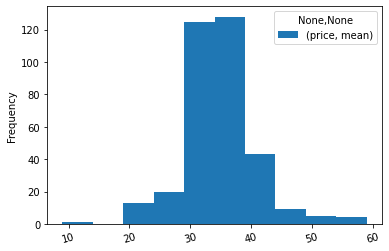

In [56]:
df.groupby(["country", "source", "sex", "age"]).agg({"price": ["mean"]}).plot(kind="hist")
plt.xticks(rotation=15)
plt.show()

# ///  GÖREV 3 - SORU 1  //////////////////////////////////////////////
soru : Önceki sorudaki çıktıyı daha iyi görebilmek için 
sort_values metodunu azalan olacak şekilde PRICE’a göre uygulayınız.
Çıktıyı agg_df olarak kaydediniz

* todos: 
1. price a göre sort et
2. groupby(["country","source","sex","age"]), aggregate using "mean" over "price"
faced problems: 
1. anlamak
2. yapılan groupby işlemine gerek var mıydı?
evet aynı kırılıma sahip aynı yaştaki gözlemler tek bir deger olarak algılanmalı,
ileride tüm bu kırılım adımlarında customer_label_based adlı degişken oluşturacagız
bu işlem yapılmadan tekilleştirmeye geçilseydi bilgi kaybı yasana bilirdi.


In [57]:
agg_df = df.pivot_table(["price"], ["country", "source", "sex", "age"], aggfunc="mean").\
    sort_values(by="price",ascending=False)

In [58]:
agg_df.head(10)

price
country source  sex    age       
bra     android male   46  59.000
usa     android male   36  59.000
fra     android female 24  59.000
usa     ios     male   32  54.000
deu     android female 36  49.000
                       51  49.000
        ios     male   20  49.000
usa     android female 47  49.000
fra     ios     male   20  49.000
usa     ios     male   59  46.500

# ///  GÖREV 4 - SORU 1  /////////////////////////////////////////////
soru : Indekste yer alan isimleri değişken ismine çeviriniz.

* todos: 
1. index isimlerini yazdır
2. index isimlerini degişkenlere cevir
* faced problems: -


In [59]:
agg_df.index

MultiIndex([('bra', 'android',   'male', 46),
            ('usa', 'android',   'male', 36),
            ('fra', 'android', 'female', 24),
            ('usa',     'ios',   'male', 32),
            ('deu', 'android', 'female', 36),
            ('deu', 'android', 'female', 51),
            ('deu',     'ios',   'male', 20),
            ('usa', 'android', 'female', 47),
            ('fra',     'ios',   'male', 20),
            ('usa',     'ios',   'male', 59),
            ...
            ('bra', 'android',   'male', 23),
            ('tur', 'android',   'male', 21),
            ('tur',     'ios',   'male', 47),
            ('bra',     'ios', 'female', 34),
            ('bra',     'ios',   'male', 47),
            ('usa',     'ios', 'female', 38),
            ('usa',     'ios', 'female', 30),
            ('can', 'android', 'female', 27),
            ('fra', 'android',   'male', 18),
            ('deu', 'android',   'male', 26)],
           names=['country', 'source', 'sex', 'age'], length=34

In [60]:
agg_df.reset_index(inplace= True)

In [61]:
agg_df.head(10)

,country,source,sex,age,price
0,bra,android,male,46,59.000
1,usa,android,male,36,59.000
2,fra,android,female,24,59.000
3,usa,ios,male,32,54.000
4,deu,android,female,36,49.000
5,deu,android,female,51,49.000
6,deu,ios,male,20,49.000
7,usa,android,female,47,49.000
8,fra,ios,male,20,49.000
9,usa,ios,male,59,46.500


# ///  GÖREV 5 - SORU 1  /////////////////////////////////////////
"""
soru : Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

* todos: 
1. age arlıklarını belirle
2. pd.cut kullan
* faced problems: -
"""

0-18 / 19-23 / 24-30 / 31-40 / 41 -90 yas aralıklarımız

In [62]:
age_class = [0,18,24,30,40,90]

In [63]:
agg_df["age_cat"] = pd.cut(agg_df["age"],age_class)

In [64]:
agg_df.head(10)

,country,source,sex,age,price,age_cat
0,bra,android,male,46,59.000,"(40, 90]"
1,usa,android,male,36,59.000,"(30, 40]"
2,fra,android,female,24,59.000,"(18, 24]"
3,usa,ios,male,32,54.000,"(30, 40]"
4,deu,android,female,36,49.000,"(30, 40]"
5,deu,android,female,51,49.000,"(40, 90]"
6,deu,ios,male,20,49.000,"(18, 24]"
7,usa,android,female,47,49.000,"(40, 90]"
8,fra,ios,male,20,49.000,"(18, 24]"
9,usa,ios,male,59,46.500,"(40, 90]"


In [65]:
agg_df["country"].value_counts()

usa    102
bra     92
deu     48
tur     48
fra     37
can     21
Name: country, dtype: int64

In [66]:
agg_df.loc[(agg_df["sex"]=="male") &
           (agg_df["source"]=="android")&
           (agg_df["country"]=="usa")]

,country,source,sex,age,price,age_cat
1,usa,android,male,36,59.000,"(30, 40]"
27,usa,android,male,47,41.500,"(40, 90]"
41,usa,android,male,43,39.909,"(40, 90]"
85,usa,android,male,26,37.000,"(24, 30]"
94,usa,android,male,20,36.647,"(18, 24]"
98,usa,android,male,30,36.143,"(24, 30]"
105,usa,android,male,51,35.875,"(40, 90]"
118,usa,android,male,41,35.429,"(40, 90]"
130,usa,android,male,18,35.190,"(0, 18]"
145,usa,android,male,23,34.849,"(18, 24]"


* verimiz yaşa göre tekilleştirilmişti ama age_cat bir aralığı kapsadıgı için
aynı age_cat degerine sahip birden fazla gözlem var.
* age_cat ıda diğar değişkenlerle birlikte düşünüp ona göre de tekilleştirmeliyiz.

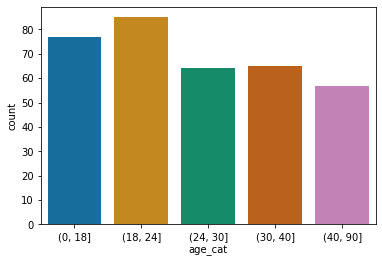

In [67]:
sns.countplot(x=agg_df["age_cat"], data = agg_df,palette="colorblind")
plt.show()

# ///  GÖREV 6 - SORU 1  ///////////////////////////////////////
"""
soru : Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

* todos: 
1. Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve veri setine değişken olarak ekleyiniz.
2. Yeni eklenecek değişkenin adı: customers_level_based
3. Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek 
customers_level_based değişkenini oluşturmanız gerekmektedir.
4. Dikkat! List comprehension ile customers_level_based değerleri oluşturulduktan 
sonra bu değerlerin tekilleştirilmesi gerekmektedir.
Örneğin birden fazla şu ifadeden olabilir:
 USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.

* faced problems: -
"""

In [68]:
agg_df["customer_level_based"] = \
    agg_df.apply(lambda row: "%s_%s_%s_%s"%(row["country"].upper(),row["source"].upper(),
                                               row["sex"].upper(),row["age_cat"]),axis=1)

In [69]:
agg_df.head()

,country,source,sex,age,price,age_cat,customer_level_based
0,bra,android,male,46,59.000,"(40, 90]","BRA_ANDROID_MALE_(40, 90]"
1,usa,android,male,36,59.000,"(30, 40]","USA_ANDROID_MALE_(30, 40]"
2,fra,android,female,24,59.000,"(18, 24]","FRA_ANDROID_FEMALE_(18, 24]"
3,usa,ios,male,32,54.000,"(30, 40]","USA_IOS_MALE_(30, 40]"
4,deu,android,female,36,49.000,"(30, 40]","DEU_ANDROID_FEMALE_(30, 40]"


In [70]:
agg_df[agg_df["customer_level_based"]=="BRA_ANDROID_MALE_(40, 90]"]

,country,source,sex,age,price,age_cat,customer_level_based
0,bra,android,male,46,59.000,"(40, 90]","BRA_ANDROID_MALE_(40, 90]"
96,bra,android,male,44,36.500,"(40, 90]","BRA_ANDROID_MALE_(40, 90]"
110,bra,android,male,41,35.667,"(40, 90]","BRA_ANDROID_MALE_(40, 90]"
292,bra,android,male,53,29.000,"(40, 90]","BRA_ANDROID_MALE_(40, 90]"


In [71]:
agg_df["customer_level_based"].value_counts()

USA_ANDROID_MALE_(40, 90]      7
USA_ANDROID_MALE_(24, 30]      6
BRA_ANDROID_FEMALE_(24, 30]    6
BRA_ANDROID_MALE_(24, 30]      6
USA_IOS_MALE_(24, 30]          6
                              ..
FRA_IOS_MALE_(40, 90]          1
TUR_ANDROID_MALE_(40, 90]      1
CAN_ANDROID_MALE_(24, 30]      1
TUR_IOS_MALE_(30, 40]          1
DEU_ANDROID_MALE_(24, 30]      1
Name: customer_level_based, Length: 107, dtype: int64

# tekilleştirme

In [72]:
agg_df1 = agg_df.groupby(["customer_level_based"]).agg({"price":"mean"})

In [76]:
agg_df1.head()

,customer_level_based,price
0,"BRA_ANDROID_FEMALE_(0, 18]",35.645
1,"BRA_ANDROID_FEMALE_(18, 24]",34.481
2,"BRA_ANDROID_FEMALE_(24, 30]",33.425
3,"BRA_ANDROID_FEMALE_(30, 40]",34.898
4,"BRA_ANDROID_FEMALE_(40, 90]",36.737


In [74]:
agg_df1.reset_index(inplace=True)

In [75]:
agg_df1.sample(10)

,customer_level_based,price
10,"BRA_IOS_FEMALE_(0, 18]",34.900
19,"CAN_ANDROID_FEMALE_(0, 18]",30.897
48,"DEU_IOS_MALE_(24, 30]",33.000
75,"TUR_ANDROID_MALE_(24, 30]",40.611
9,"BRA_ANDROID_MALE_(40, 90]",40.042
47,"DEU_IOS_MALE_(18, 24]",39.000
46,"DEU_IOS_MALE_(0, 18]",37.000
32,"CAN_IOS_MALE_(40, 90]",31.000
95,"USA_ANDROID_MALE_(30, 40]",35.905
39,"DEU_ANDROID_MALE_(18, 24]",34.657


# ///  GÖREV 7 - SORU 1  ////////////////////////////////////////////
"""
soru : Yeni müşterileri (personaları) segmentlere ayırınız.

* todos: 
1. Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız
(böyle birşey yapılamz gözlemler tekilleştirildi)
2. Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz
3. Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).

* faced problems: segmentleme işlemi en yüksekten en düşüge göre mi yapacak yoksa tam tersi mi?
(qcut price degişkeni küçükte buyuge sıralayıp en kucuk %0-%25lik parçaya D, %25-%50lik parçaya C,
  %50-%75lik parçaya B, %75-%100 lik parçaya A diye label ekleyecek 
  böyle olsaydı segment sayılarının aynı olmasını beklerdik
* link:
https://stackoverflow.com/questions/59482017/bin-labels-must-be-one-fewer-than-the-number-of-bin-edges-after-passing-pd-qcu
"""

In [77]:
pd.set_option("display.max_columns",None)
agg_df1.head()

,customer_level_based,price
0,"BRA_ANDROID_FEMALE_(0, 18]",35.645
1,"BRA_ANDROID_FEMALE_(18, 24]",34.481
2,"BRA_ANDROID_FEMALE_(24, 30]",33.425
3,"BRA_ANDROID_FEMALE_(30, 40]",34.898
4,"BRA_ANDROID_FEMALE_(40, 90]",36.737


In [78]:
label=["D","C","B","A"]

In [79]:
agg_df1["segment"] = pd.qcut(agg_df1["price"],4,duplicates="drop")
agg_df1.head()

,customer_level_based,price,segment
0,"BRA_ANDROID_FEMALE_(0, 18]",35.645,"(34.104, 35.948]"
1,"BRA_ANDROID_FEMALE_(18, 24]",34.481,"(34.104, 35.948]"
2,"BRA_ANDROID_FEMALE_(24, 30]",33.425,"(32.289, 34.104]"
3,"BRA_ANDROID_FEMALE_(30, 40]",34.898,"(34.104, 35.948]"
4,"BRA_ANDROID_FEMALE_(40, 90]",36.737,"(35.948, 42.333]"


In [80]:
agg_df1["segment"] = pd.qcut(agg_df1["price"],4,labels=label,duplicates="drop")
agg_df1.head()

,customer_level_based,price,segment
0,"BRA_ANDROID_FEMALE_(0, 18]",35.645,B
1,"BRA_ANDROID_FEMALE_(18, 24]",34.481,B
2,"BRA_ANDROID_FEMALE_(24, 30]",33.425,C
3,"BRA_ANDROID_FEMALE_(30, 40]",34.898,B
4,"BRA_ANDROID_FEMALE_(40, 90]",36.737,A


In [81]:
agg_df1["segment"].value_counts()

D    27
C    27
A    27
B    26
Name: segment, dtype: int64

In [82]:
agg_df1.groupby("segment")[["price"]].aggregate(["min","max","mean","sum"])

price                       
           min    max   mean      sum
segment                              
D        9.000 32.245 29.105  785.828
C       32.333 34.104 33.357  900.642
B       34.119 35.923 34.966  909.116
A       35.973 42.333 38.163 1030.408

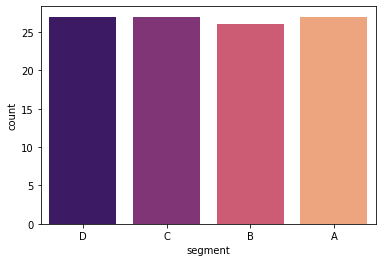

In [83]:
sns.countplot(x=agg_df1["segment"],data = agg_df1,palette="magma")
plt.show()

# ///  GÖREV 8 - SORU 1  //////////////////////////////////////////////
"""
soru : Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.

* todos: 
1. 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir 
ve ortalama ne kadar gelir kazandırması beklenir?
2. 35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir 
ve ortalama ne kadar gelir kazandırması beklenir?

* faced problems: -
"""

In [84]:
new_user1 = "TUR_ANDROID_FEMALE_(30, 40]"
new_user2 = "FRA_IOS_FEMALE_(30, 40]"

In [85]:
agg_df1[agg_df1["customer_level_based"]==new_user1]

,customer_level_based,price,segment
71,"TUR_ANDROID_FEMALE_(30, 40]",41.833,A


In [86]:
agg_df1[agg_df1["customer_level_based"]==new_user2]

,customer_level_based,price,segment
62,"FRA_IOS_FEMALE_(30, 40]",32.818,C
